In [13]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
## Error not show!!
import warnings , os
warnings.filterwarnings(action='ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

from inception_resnet_v1_lcl import *
from functools import partial
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Lambda
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import add
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.image as mpimg
from PIL import Image
import os
import matplotlib.pyplot as plt
from face_capture3 import *
%matplotlib inline
def set_model(weight):
    base_model = InceptionResNetV1(input_shape=(224, 224, 3),
                                   dropout_keep_prob=0.8)
    checkpoint_dir = os.getcwd()+"/model/"
    base_model = InceptionResNetV1(weights_path=checkpoint_dir+weight,
                                   input_shape=(224, 224, 3),
                                   dropout_keep_prob=0.8)
    for layer in base_model.layers[:]:
        layer.trainable = False
    #base_model.summary()
    classes = 10
    epochs = 100
    #epochs = 500
    targetx = 224
    targety = 224

    x = base_model.get_layer(index=442).output
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(1024, activation='relu',  kernel_initializer='he_normal', bias_initializer='zeros')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(classes, activation='softmax')(x)

    my_model = Model(inputs=base_model.input, outputs=predictions)

    #my_model.summary()

    #making the instance of 'ImageDataGenerator' 
    train_datagen = ImageDataGenerator(rescale=1./255,
                                       rotation_range=30,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode='nearest')

    val_datagen = ImageDataGenerator(rescale=1./255)

    # setting the path of datasets
    train_dir = os.getcwd()+"/img/train"
    val_dir = os.getcwd()+"/img/val"

    train_generator = train_datagen.flow_from_directory(train_dir, 
                                                        batch_size=10, 
                                                        target_size=(targetx, targety),
                                                        shuffle=True,
                                                        class_mode='categorical')

    val_generator = val_datagen.flow_from_directory(val_dir, 
                                                    batch_size=5, 
                                                    target_size=(targetx, targety),
                                                    shuffle=True,
                                                    class_mode='categorical')

    from tensorflow.keras.models import load_model

    checkpoint_dir = os.getcwd()+"/model/"
    model = my_model
    #model = load_model(checkpoint_dir+"weight_1.hdf5")
    model.load_weights(checkpoint_dir+weight)
    #model.save_weights("./model/0803_1700")

    #model.summary()
    return model

In [ ]:
def test(model, image):
    

    # test 폴더에 있는 이미지를 이용해서 인식 / 분류 실행 
    import numpy as np
    import matplotlib.image as mpimg
    from PIL import Image
    from tensorflow.keras.applications.imagenet_utils import preprocess_input
    from tensorflow.keras import backend as K
    import matplotlib.pyplot as plt
    %matplotlib inline

    targetx = 224
    targety = 224

    train_dir = os.getcwd()+"/img/train/"

    image_path = []
    class_list = os.listdir(train_dir)
    #for i in os.listdir(test_dir):
        #test_image_name = test_dir + i
        #image_path.append(test_image_name)  

    #img = Image.open(image)
    #img = img.convert("RGB")
    #img = img.resize((targetx,targety))    
    #data = np.asarray(img)
    #X = np.array(data)
    #X = X.astype("float") / 256
    #X = X.reshape(-1, targetx, targety,3)
    
    res = cv2.resize(image, dsize=(224, 224))
    res_image = res.astype("float") / 256
    X = res_image.reshape(-1, targetx, targety,3)
    categories = class_list
    pred = model.predict(X)
    #print(pred[0])
    result = [np.argmax(value) for value in pred]   # 예측 값중 가장 높은 클래스 반환
    print('New image prediction : ',categories[result[0]])
    print("accuracy : {}".format(max(pred[0])))
    plt.imshow(image)
    plt.show()
    
def test_video(model, videoFile, second_set):
    model = set_model(weight)
    frame_list_crop = face_crop(videoFile, second_set)
    for i in frame_list_crop :
        for j in i:
            test(weight, j)

영상의 길이 :  391.5912 초
205 초 앞 뒤  0.25 초 frame 불러오기
[i] ==> # detected faces: 2
############################################################
[i] ==> # detected faces: 2
############################################################
[i] ==> # detected faces: 2
############################################################
Found 800 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
New image prediction :  cha
accuracy : 0.9997294545173645


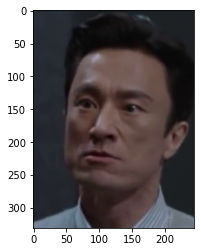

Found 800 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
New image prediction :  yoon
accuracy : 0.8456694483757019


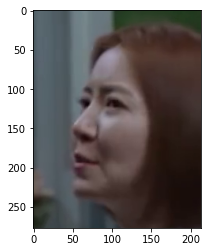

Found 800 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
New image prediction :  cha
accuracy : 0.9998818635940552


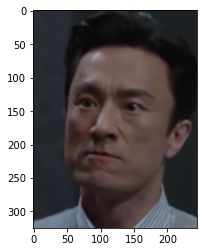

Found 800 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
New image prediction :  yoon
accuracy : 0.9220999479293823


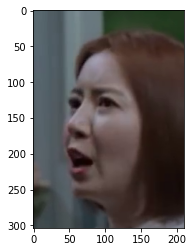

Found 800 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
New image prediction :  cha
accuracy : 0.9999821186065674


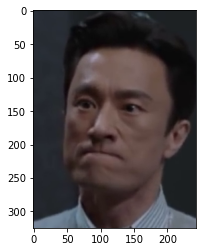

Found 800 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
New image prediction :  yoon
accuracy : 0.9763708114624023


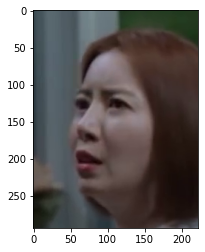

In [14]:
test_video("0803_1700", "C://python_files/new/sample.mp4", 205)

In [16]:
train_dir = os.getcwd()+"/img/train/"

image_path = []
class_list = os.listdir(train_dir)
class_list

['cha',
 'choi',
 'hyena',
 'jeonga',
 'jjin',
 'junho',
 'lee',
 'woo',
 'yeseo',
 'yoon']